In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

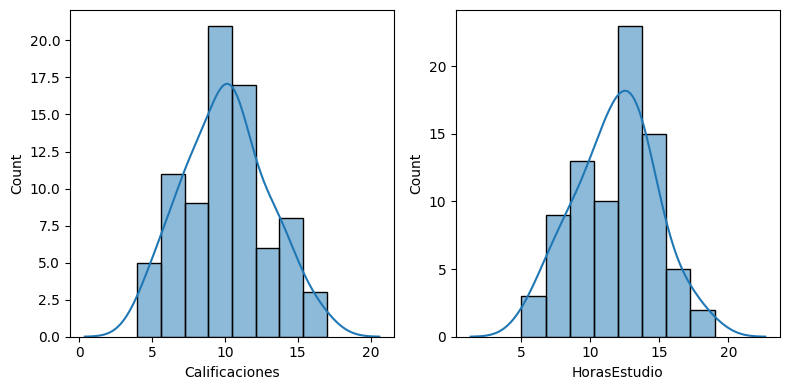

In [2]:
df_calf = pd.read_csv('calificaciones_positivas.csv', index_col='Estudiante')
df_hrs = pd.read_csv('HorasEstudio.csv', index_col='Estudiante')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
sns.histplot(df_calf['Calificaciones'], ax=ax1, kde=True, kde_kws=dict(cut=3))
sns.histplot(df_hrs['HorasEstudio'], ax=ax2, kde=True, kde_kws=dict(cut=3))
plt.tight_layout()

## **Población de 80 estudiantes**

In [3]:
df = df_calf.join(df_hrs)
df.describe()

,Calificaciones,HorasEstudio
count,80.000000,80.000000
mean,10.062500,11.800000
std,2.887528,2.944207
min,4.000000,5.000000
25%,8.000000,10.000000
50%,10.000000,12.000000
75%,12.000000,14.000000
max,17.000000,19.000000


## **Tamaño de Muestra para la _Media Poblacional_**
$$n_0=\frac{Z^2\times \sigma^2}{\varepsilon^2}$$

Nivel de Confianza de 95% equivale a 1.96

In [31]:
z = 1.96
var = df['Calificaciones'].var()
e = 0.05

n = ((z**2) * var) / (e**2)
n = n/1000
int(np.ceil(n))


13

In [47]:
def tamano_muestra_media_poblacional(df, column):
    z = 1.96
    var = df[column].var()
    e = 0.05

    n = ((z**2) * var) / (e**2)
    n = n/1000
    print(df[column].std())
    print(n)
    print(int(np.ceil(n)))

In [48]:
tamano_muestra_media_poblacional(df, 'Calificaciones')

2.887527741112837
12.812222278481007
13


Para poblaciones **Finitas** en nuestro caso es `N = 80`
$$n=\frac{n_0}{1+\frac{n_0}{N}}$$

In [44]:
N = 80
n_ajustado = (n) / (1 + ((n - 1)/ N))
print(f"n_ajustado: {n_ajustado:.2f}")
tamano_muestra = int(np.ceil(n_ajustado))
print(f"Con un nivel de confianza de 95% y margen de error del {e*100}%, el tamaño de la muestra es {tamano_muestra}")

n_ajustado: 11.16
Con un nivel de confianza de 95% y margen de error del 5.0%, el tamaño de la muestra es 12


## **Muestra mediante muestreo aleatorio simple**

In [6]:
import random
random.seed(23)
poblacion = list(range(1, 81))  # Población del 1 al 80

# Selecciona la muestra aleatoria simple
muestra = random.sample(poblacion, tamano_muestra)

print("Los estudiantes seleccionados son:", muestra)


Los estudiantes seleccionados son: [38, 11, 3, 76, 40, 55, 49, 68, 46, 17, 25, 35]


In [7]:
df_muestra = df.loc[df.index.intersection(muestra)]
df_muestra

,Calificaciones,HorasEstudio
Estudiante,,
3,13,14
11,11,11
17,15,14
25,11,14
35,7,11
38,11,9
40,10,12
46,12,11
49,10,8


<Axes: ylabel='Count'>

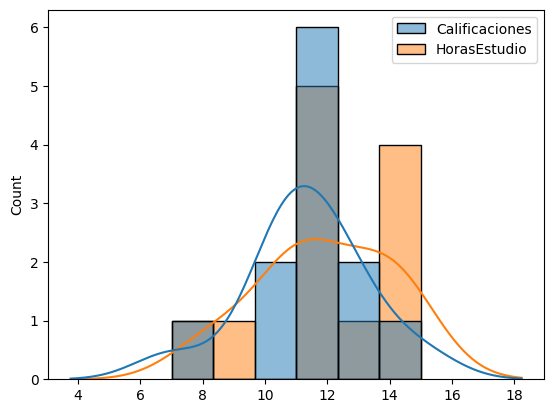

In [8]:
sns.histplot(df_muestra, kde=True, kde_kws=dict(cut=3))

## **Intervalo de Confianza para la _Media poblacional_**

$$S\overline{x}=\sqrt{\left(\frac{N-n}{N}\right)\left(\frac{S^2}{n}\right)}$$

In [9]:
import statsmodels.api as sm

In [10]:
df_muestra.describe()

,Calificaciones,HorasEstudio
count,12.000000,12.000000
mean,11.333333,11.916667
std,1.969464,2.151462
min,7.000000,8.000000
25%,10.750000,11.000000
50%,11.000000,11.500000
75%,12.250000,14.000000
max,15.000000,15.000000


In [ ]:
n = len(df_muestra)
mean_sample_calif = df_muestra['Calificaciones'].mean()
std_sample_calif = df_muestra['Calificaciones'].std()
#se_sample_calif = std_sample_calif / np.sqrt(n)
se_sample_calif = np.sqrt(((N-n)/N)*(df_muestra['Calificaciones'].var()/n))
lcb = mean_sample_calif - z * se_sample_calif
ucb = mean_sample_calif + z * se_sample_calif
print(f"Tamaño de la muestra: {n}")
print(f"Media: {mean_sample_calif:.2f}")
print(f"Desviación Estandar: {std_sample_calif:.2f}")
print(f"Error Estandar: {se_sample_calif:.2f}")
print(f"Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre {lcb:.2f} y {ucb:.2f}")

In [22]:
def intervalo_confianza(df, column, z):
    N = 80
    n = len(df)
    mean_sample = df[column].mean()
    std_sample = df[column].std()
    #se_sample_calif = std_sample_calif / np.sqrt(n)
    se_sample = np.sqrt(((N-n)/N)*(df[column].var()/n))
    lcb = mean_sample - z * se_sample
    ucb = mean_sample + z * se_sample
    print(f"Tamaño de la muestra: {n}")
    print(f"Media: {mean_sample:.2f}")
    print(f"Desviación Estandar: {std_sample:.2f}")
    print(f"Error Estandar: {se_sample:.2f}")
    print(f"Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre {lcb:.2f} y {ucb:.2f}")

In [23]:
intervalo_confianza(df_muestra, 'Calificaciones', z)

Tamaño de la muestra: 12
Media: 11.33
Desviación Estandar: 1.97
Error Estandar: 0.52
Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre 10.31 y 12.36


---

In [12]:
sistematico = [29, 65, 19, 12, 42, 39, 30, 64, 9, 26, 13, 43]
df_muestra_hrs = df.loc[df.index.intersection(sistematico)]
df_muestra_hrs

,Calificaciones,HorasEstudio
Estudiante,,
9,16,15
12,8,8
13,15,13
19,7,13
26,8,13
29,9,8
30,6,10
39,4,15
42,8,7


<Axes: ylabel='Count'>

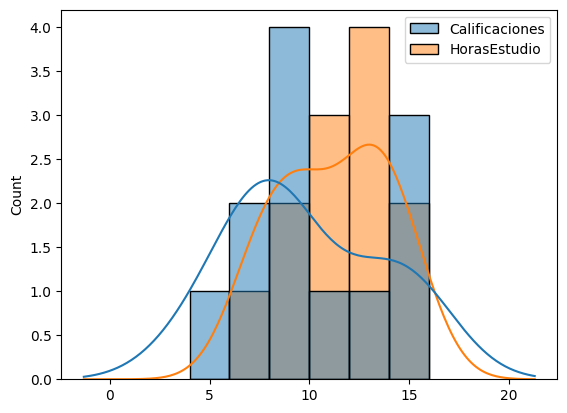

In [13]:
sns.histplot(df_muestra_hrs, kde=True, kde_kws=dict(cut=3))

In [25]:
intervalo_confianza(df_muestra_hrs, 'HorasEstudio', z)

Tamaño de la muestra: 12
Media: 11.25
Desviación Estandar: 2.77
Error Estandar: 0.74
Con un 95% de confianza decimos que la media de la muestra de calificaciones esta entre 9.81 y 12.69
